Imports

In [190]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

Lecture de l'image

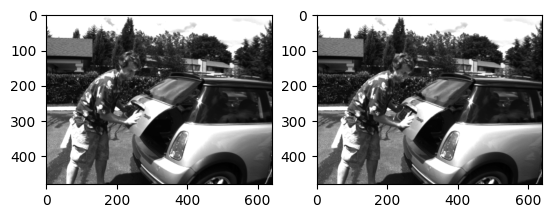

In [191]:
I1 = cv2.imread("MiniCooper/i0001.png",0)/255
I2 = cv2.imread("MiniCooper/i0002.png",0)/255
plt.figure(1)
plt.subplot(121)
plt.imshow(I1,"gray")
plt.subplot(122)
plt.imshow(I2,"gray")

Paramètres

In [192]:
gt = I2-I1
gx = cv2.Sobel(I1, cv2.CV_64F, 1, 0, ksize=5)
gy = cv2.Sobel(I1, cv2.CV_64F, 0, 1, ksize=5)
l =100 # Influence de la cohérence spatiale
N = 400 #Nombre d'itérations
eps = 0.1 # Précision

Algorithme

2391.857190431329
374
-0.09965740132520295


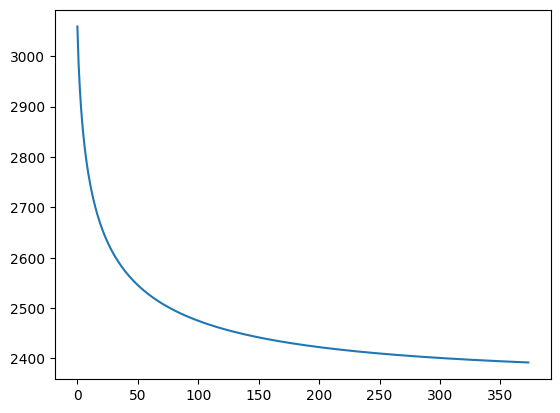

In [193]:
u = [np.zeros(I1.shape)]
v = [np.zeros(I1.shape)]

noyau = (1/8)*np.array([[1, 1, 1],
                    [1,  0,  1],
                    [1, 1, 1]])
E = []
compteur = 0
for k in range(N) : 
    compteur +=1
    u_bar = cv2.filter2D(u[-1],-1,noyau)
    v_bar = cv2.filter2D(v[-1],-1,noyau)
    A = ((gx*u_bar+gy*v_bar+gt)/(l**2+gx**2+gy**2))
    
    u_iter = u_bar -gx*A
    v_iter = v_bar -gy*A

    u.append(u_iter)
    v.append(v_iter)

    e = np.linalg.norm(gx*u[-2] + gy*v[-2] + gt,'fro')**2 + l*(np.linalg.norm(u[-1]-u[-2],'fro')**2 + np.linalg.norm(v[-1]-v[-2],'fro')**2)
    E.append(e)
    if len(E) >2 : 
        if abs(E[-1] - E[-2]) < eps : 
            break#ing bad


plt.plot(E)
print(e)
print(compteur)

print(E[-1] - E[-2])

Affichage du Flux Optique

In [195]:
from detection import showOpticalFlow
showOpticalFlow(I1,u[-1],v[-1],l*4,5,0.05)

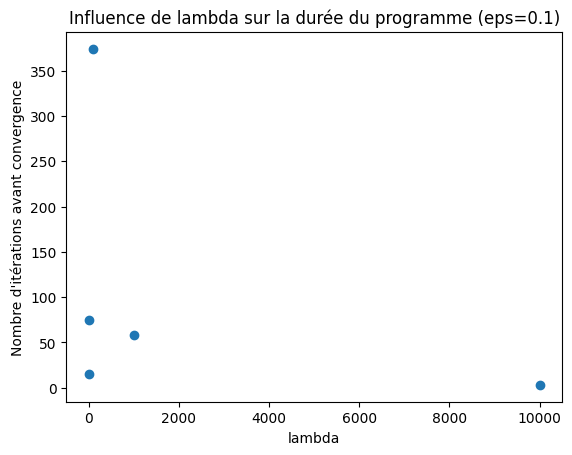

In [198]:
L = [0.1,10,100,1000,10000]
Y = [15,75,374,58,3]

plt.figure()
plt.title("Influence de lambda sur la durée du programme (eps=0.1)")
plt.xlabel("lambda")
plt.ylabel("Nombre d'itérations avant convergence")
plt.scatter(L,Y)